Melakukan Operasi Image Filtering dengan OpenCV
1. Low-Pass Filtering


In [8]:
# memanggil modul yang diperlukan
import cv2
import numpy as np
from matplotlib import pyplot as plt
#jika menggunakan google colab jgn lupa load code di bawah ini
#from google.colab.patches import cv2_imshow


#bgr
img = cv2.imread('singa.jpg')

#rgb
cat = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# tampilkan gambar awal tanpa filter
cv2.imshow('Gambar Asli',img)


# membuat filter: matriks berukuran 5 x 5 
kernel = np.ones((5,5),np.float32)/25
print(kernel)

# lakukan filtering
kucing_filter = cv2.filter2D(img,-1,kernel)

cv2.imshow('Gambar Filter',kucing_filter)

# salt and pepper

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


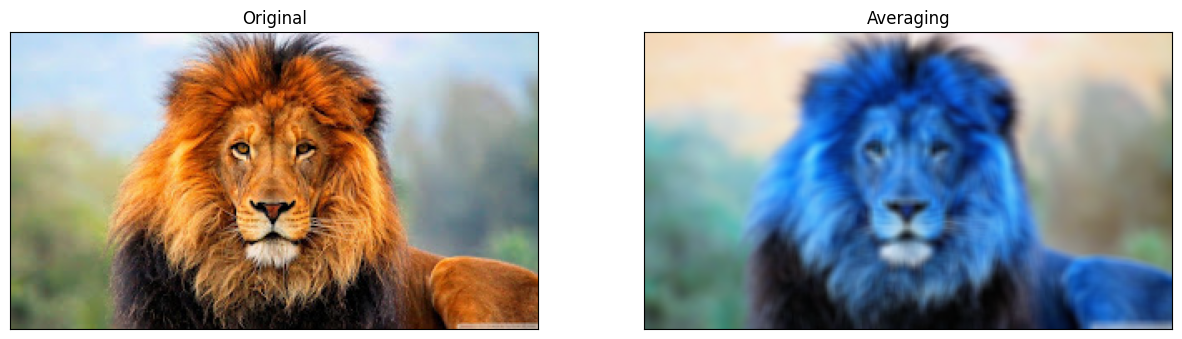

In [9]:
# perbesar ukuran hasil plotting jika diperlukan
plt.rcParams["figure.figsize"] = (15,15)

# plot pertama, gambar asli
plt.subplot(121),plt.imshow(cat),plt.title('Original')
plt.xticks([]), plt.yticks([])

# kedua, hasil filter
plt.subplot(122),plt.imshow(kucing_filter),
plt.title('Averaging')
plt.xticks([]), plt.yticks([])

# Plot!
plt.show()

Pertanyaan 1: Mengapa hasil plotting berubah warnanya? apa yang perlu dilakukan untuk mengkoreksinya?

Jawab :
Perubahan warna pada hasil plotting dapat disebabkan oleh beberapa faktor, di antaranya:
1. Skala Nilai: Plotting menggunakan skala nilai yang berbeda-beda untuk sumbu x dan sumbu y. Jika skala nilai yang digunakan tidak seimbang antara sumbu x dan y, dapat menyebabkan perubahan warna pada hasil plotting.
2. Skala Warna: Plotting menggunakan skala warna yang ditentukan oleh palet warna yang digunakan. Jika palet warna yang digunakan tidak seimbang atau tidak cocok dengan data yang diplot, dapat mengakibatkan perubahan warna yang tidak diinginkan.
Untuk mengkoreksi perubahan warna pada hasil plotting, beberapa langkah yang dapat dilakukan adalah:
1. Menyesuaikan Skala Nilai: Pastikan skala nilai pada sumbu x dan sumbu y seimbang. Jika perlu, atur batas nilai sumbu x dan y agar memberikan hasil yang sesuai dengan data yang akan diplot.
2. Menggunakan Palet Warna yang Tepat: Pilih palet warna yang cocok dengan data yang akan diplot. Beberapa palet warna umum seperti colormap "viridis", "jet", atau "cividis" dapat digunakan untuk memperoleh visualisasi yang lebih baik.
3. Normalisasi Data: Jika perubahan warna disebabkan oleh variasi data yang besar, normalisasi data dapat membantu untuk memperoleh skala warna yang lebih seimbang. Misalnya, menggunakan teknik seperti z-score atau min-max scaling untuk mengubah rentang nilai data menjadi lebih terkonsentrasi pada interval yang lebih sempit.
4. Mencari Alternatif Plotting: Jika masalah perubahan warna tidak dapat diatasi dengan langkah-langkah di atas, mungkin perlu mencari alternatif metode plotting yang lebih cocok untuk data yang sedang diproses. Misalnya, menggunakan jenis plot yang berbeda atau mempertimbangkan visualisasi data dalam bentuk yang lain.
Dengan melakukan langkah-langkah tersebut, diharapkan perubahan warna pada hasil plotting dapat dikoreksi sehingga menghasilkan visualisasi yang lebih sesuai dan informatif.


In [10]:
kucing_blur = cv2.blur(img,(5,5))

cv2.imshow('Gambar blur',kucing_blur)

In [11]:
# ini adalah cara lain untuk membuat sebuah kernel, 
# yaitu dengan menggunakan np.matrix
# kali ini, ukuran matriksnya 3 x 3
kernel = np.matrix([
          [1, 1, 1],
          [1, 2, 1],
          [1, 1, 1]         
          ])/25
print(kernel)

# buat lagi filteringnya
kucing_filter = cv2.filter2D(img,-1,kernel)

# tampilkan
cv2.imshow('Gambar filter',kucing_filter)

[[0.04 0.04 0.04]
 [0.04 0.08 0.04]
 [0.04 0.04 0.04]]


Pertanyaan 2: Contoh di atas merupakan Averaging Filter. Seperti namanya, kernel pada filter tersebut dibuat agar seluruh piksel yang bertetangga dikurangi nilainya. Kira-kira apa kegunaan dari filter seperti ini? apa pengaruh ukuran filter pada hasil filtering tersebut?

Jawab :
Filter Averaging (rata-rata) digunakan dalam pengolahan citra untuk melakukan proses filtering yang bertujuan untuk menghaluskan atau mengurangi kebisingan pada citra. Filter ini bekerja dengan mengambil nilai rata-rata dari piksel-piksel di sekitar piksel yang sedang diproses. 

Kegunaan utama dari filter Averaging adalah:
1. Penghalusan (Smoothing): Filter Averaging dapat digunakan untuk menghaluskan citra dengan mengurangi kebisingan atau detail-detail kecil yang tidak diinginkan. Hal ini berguna dalam mengurangi kebisingan yang disebabkan oleh faktor-faktor seperti sinyal acak atau ketidaksempurnaan dalam perangkat keras pengambil gambar.
2. Preprocessing: Filter Averaging sering digunakan sebagai langkah pra-pemrosesan sebelum melakukan operasi lebih lanjut pada citra. Misalnya, dapat digunakan sebelum melakukan segmentasi atau ekstraksi fitur pada citra.
Pengaruh ukuran filter pada hasil filtering tersebut adalah:
1. Efek Penghalusan: Semakin besar ukuran filter Averaging, semakin besar efek penghalusan yang diberikan pada citra. Ukuran filter yang lebih besar akan meratakan detail-detail kecil secara lebih signifikan, menghasilkan citra yang lebih halus secara keseluruhan.
2. Resolusi Spasial: Ukuran filter Averaging juga mempengaruhi resolusi spasial citra yang dihasilkan. Semakin besar ukuran filter, semakin banyak informasi spasial yang hilang, dan citra hasil filtering akan memiliki resolusi spasial yang lebih rendah.
3. Pengurangan Detail: Ukuran filter yang besar dapat mengakibatkan pengurangan detail yang signifikan pada citra. Detail kecil seperti tepi atau tekstur halus mungkin menjadi tidak terlihat atau terhaluskan secara berlebihan.
Perlu dicatat bahwa meskipun filter Averaging efektif dalam mengurangi kebisingan, ia juga dapat menyebabkan hilangnya detail penting atau mengaburkan tepi yang penting dalam citra. Oleh karena itu, ukuran filter yang tepat harus dipilih dengan hati-hati, dengan mempertimbangkan keseimbangan antara penghalusan dan kehilangan detail.


2. High-Pass Filtering


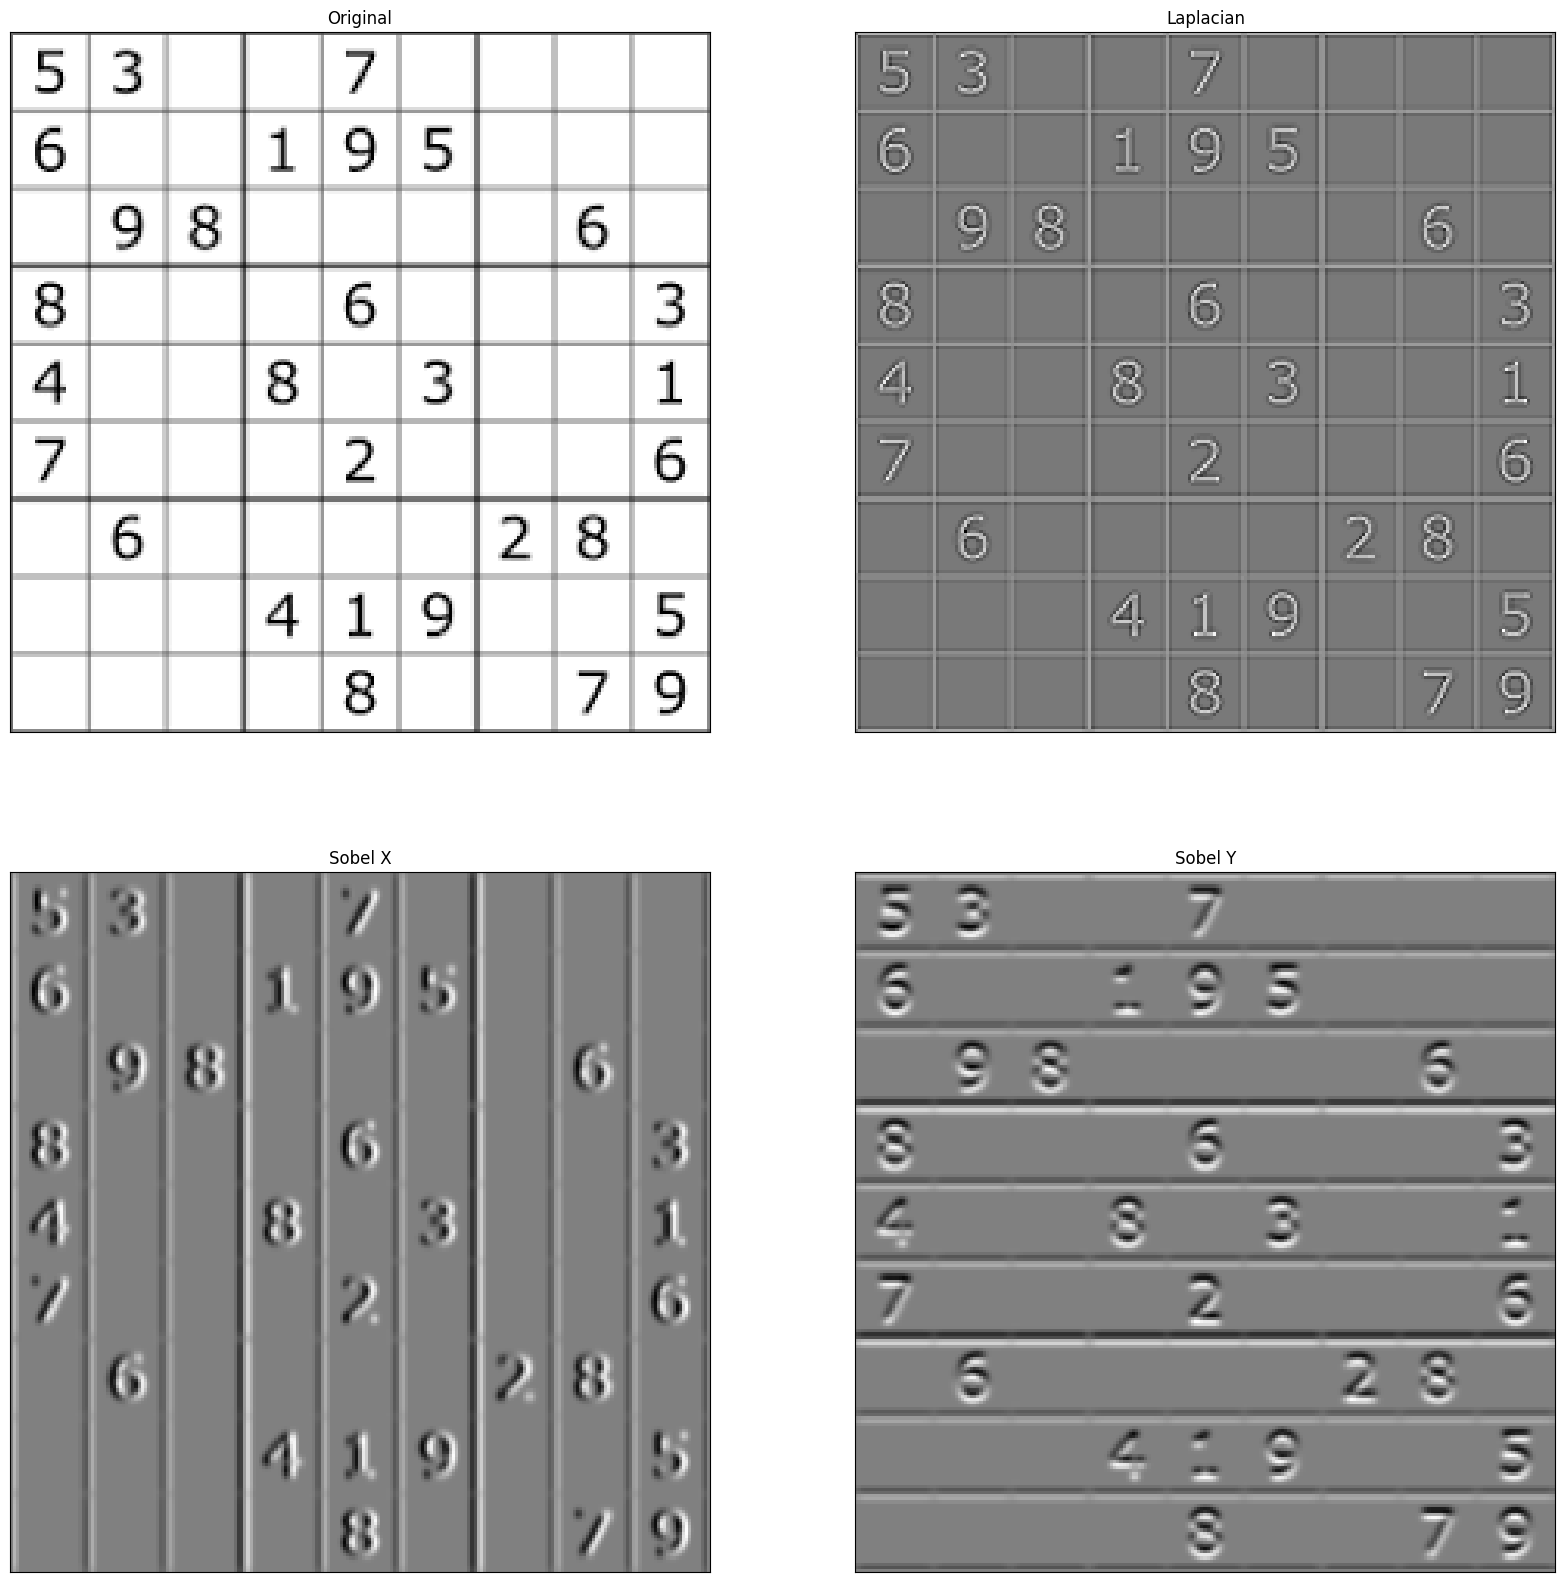

In [12]:
# Highpass Filter

# sebenarnya kita tidak perlu melakukan filtering lagi. Cukup sekali saja 
# di bagian awal, selama notebook ini tetap terhubung
import cv2
import numpy as np
from matplotlib import pyplot as plt


# memanggil citra sebagai grayscale (argument 0)
img = cv2.imread('sudoku.jpg',0)

# menerapkan algoritma high-pass filtering:
# laplacian
laplacian = cv2.Laplacian(img,cv2.CV_64F)

# sobel dengan ukuran kernel 5
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

# Catatan:
# CV_64F pada contoh di atas menunjukkan nilai bit dari citra 
# yang dihasilkan serta tipe datanya (F = Float)

# perbesar ukuran hasil plotting 
plt.rcParams["figure.figsize"] = (20,20)


# menampilkan hasil filter
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

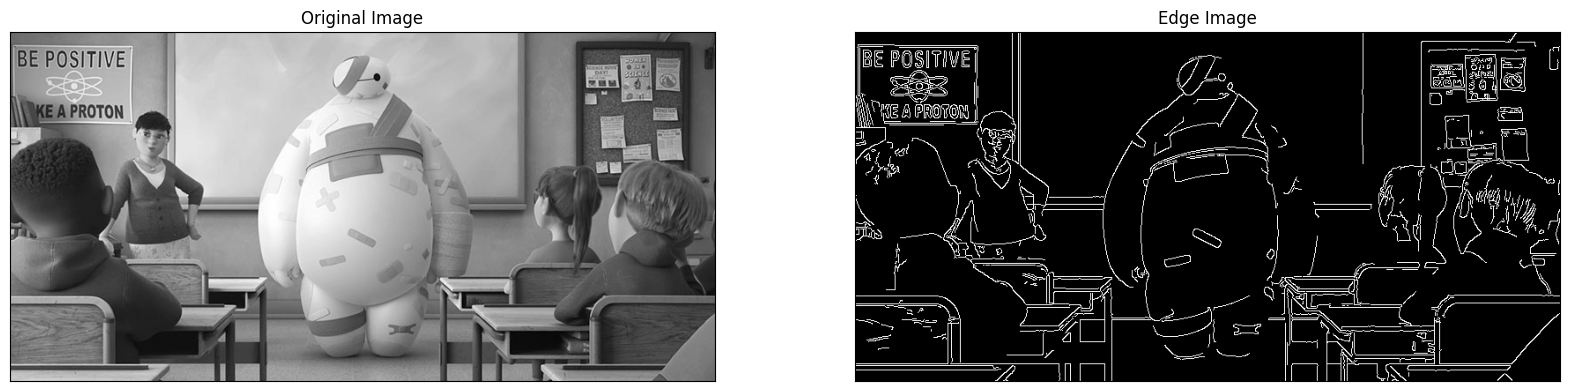

In [13]:
# memanggil citra sebagai grayscale (argument 0)
img = cv2.imread('baymax.jpg',0)

# memanggil fungsi Canny Edges dengan argument (citra, nilai_min, nilai_max)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

Menggunakan OpenCV untuk Thresholding
OpenCV memiliki beberapa fungsi untuk Thresholding. Binary Thresholding barangkali adalah yang paling sederhana dan banyak digunakan untuk memisahkan antara objek dengan gambar latar. Berikut adalah contoh bagaimana melakukan thresholding dengan OpenCV

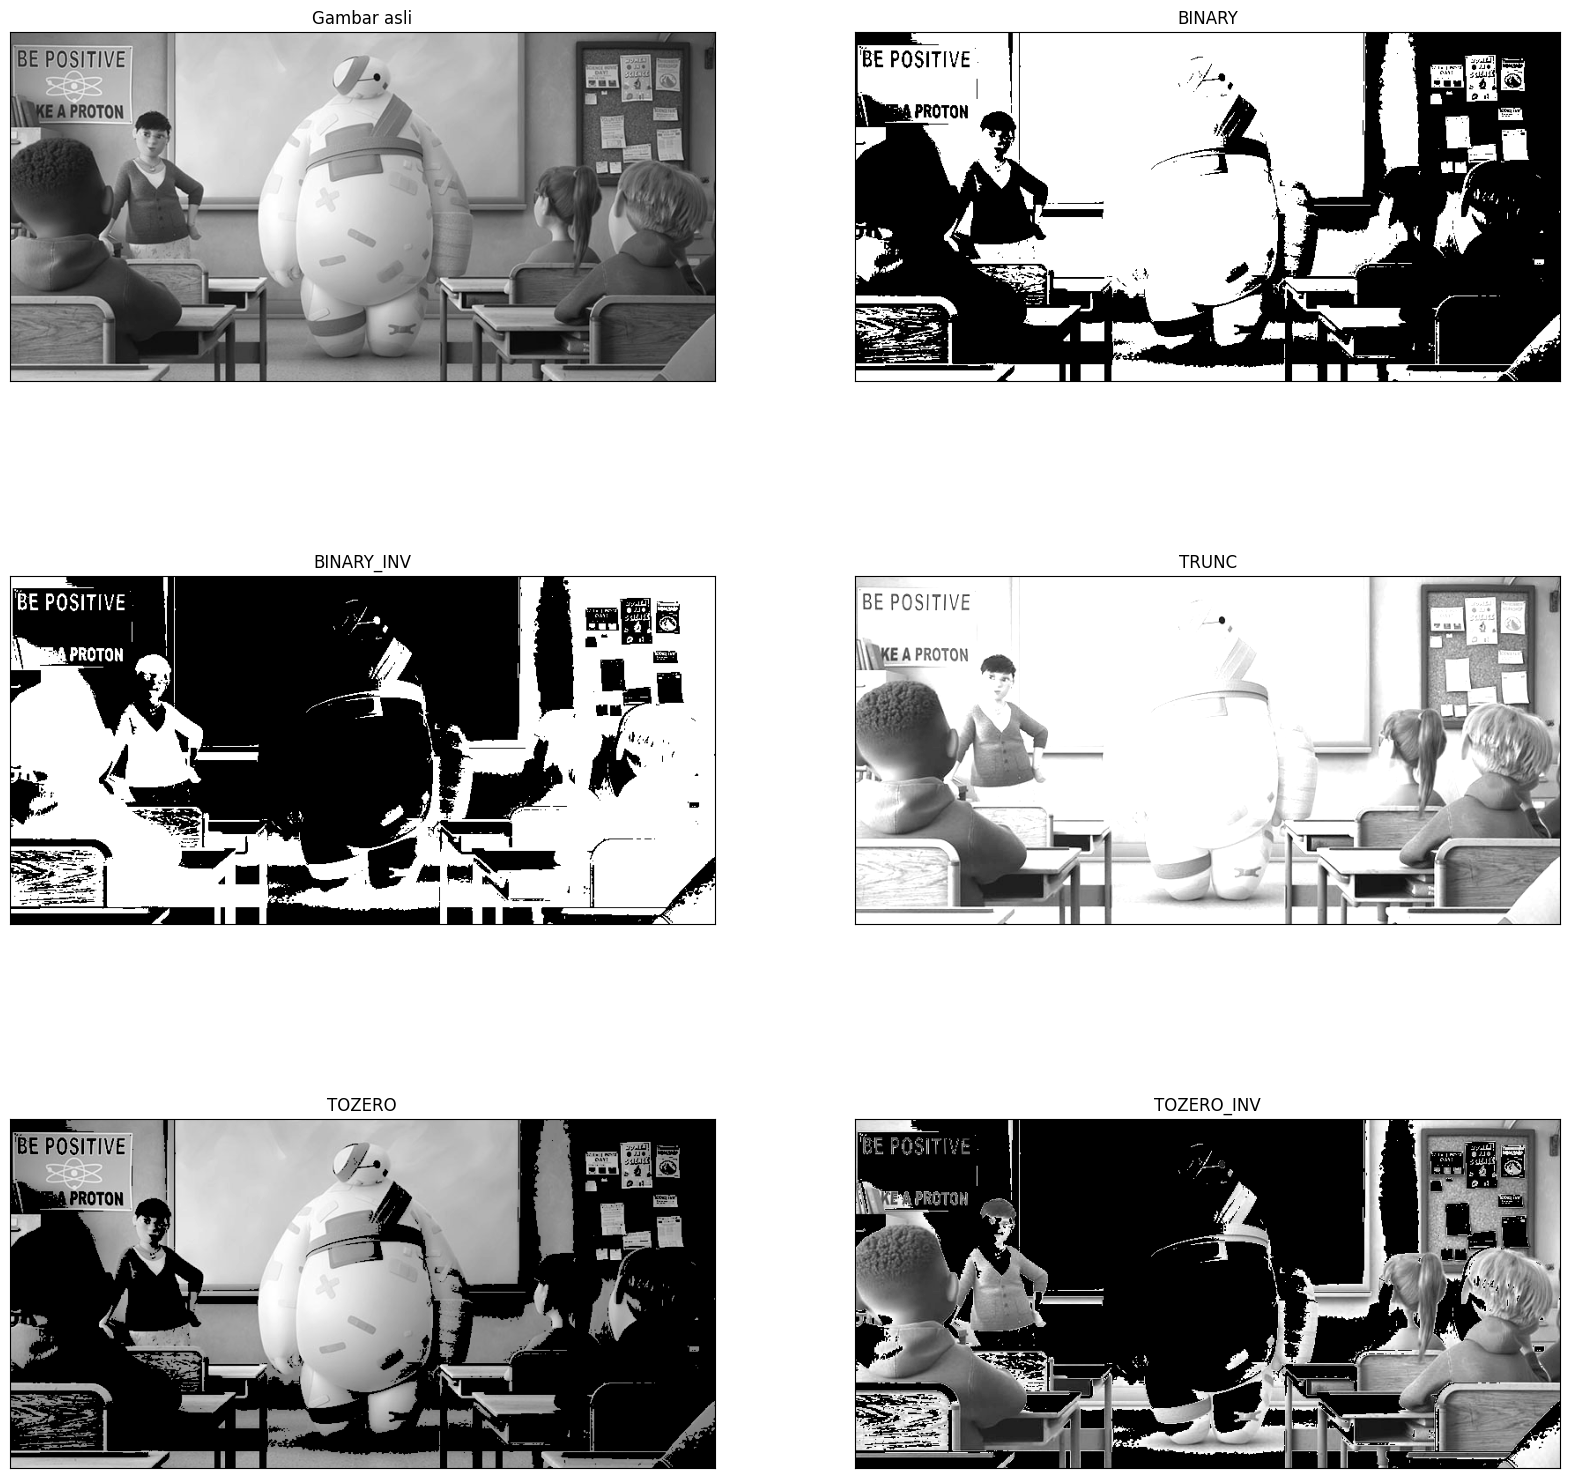

In [14]:
# membaca gambar baymax 
img = cv2.imread('baymax.jpg',0)

# Hitungan threshold. 
# Perhatikan nilai ambang batas bawah dan atas dari tiap fungsi 
# yang diberikan
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

# menampilkan hasil
titles = ['Gambar asli','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# menampilkan beberapa gambar sekaligus
for i in range(6):
    # 3 baris, 2 kolom
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

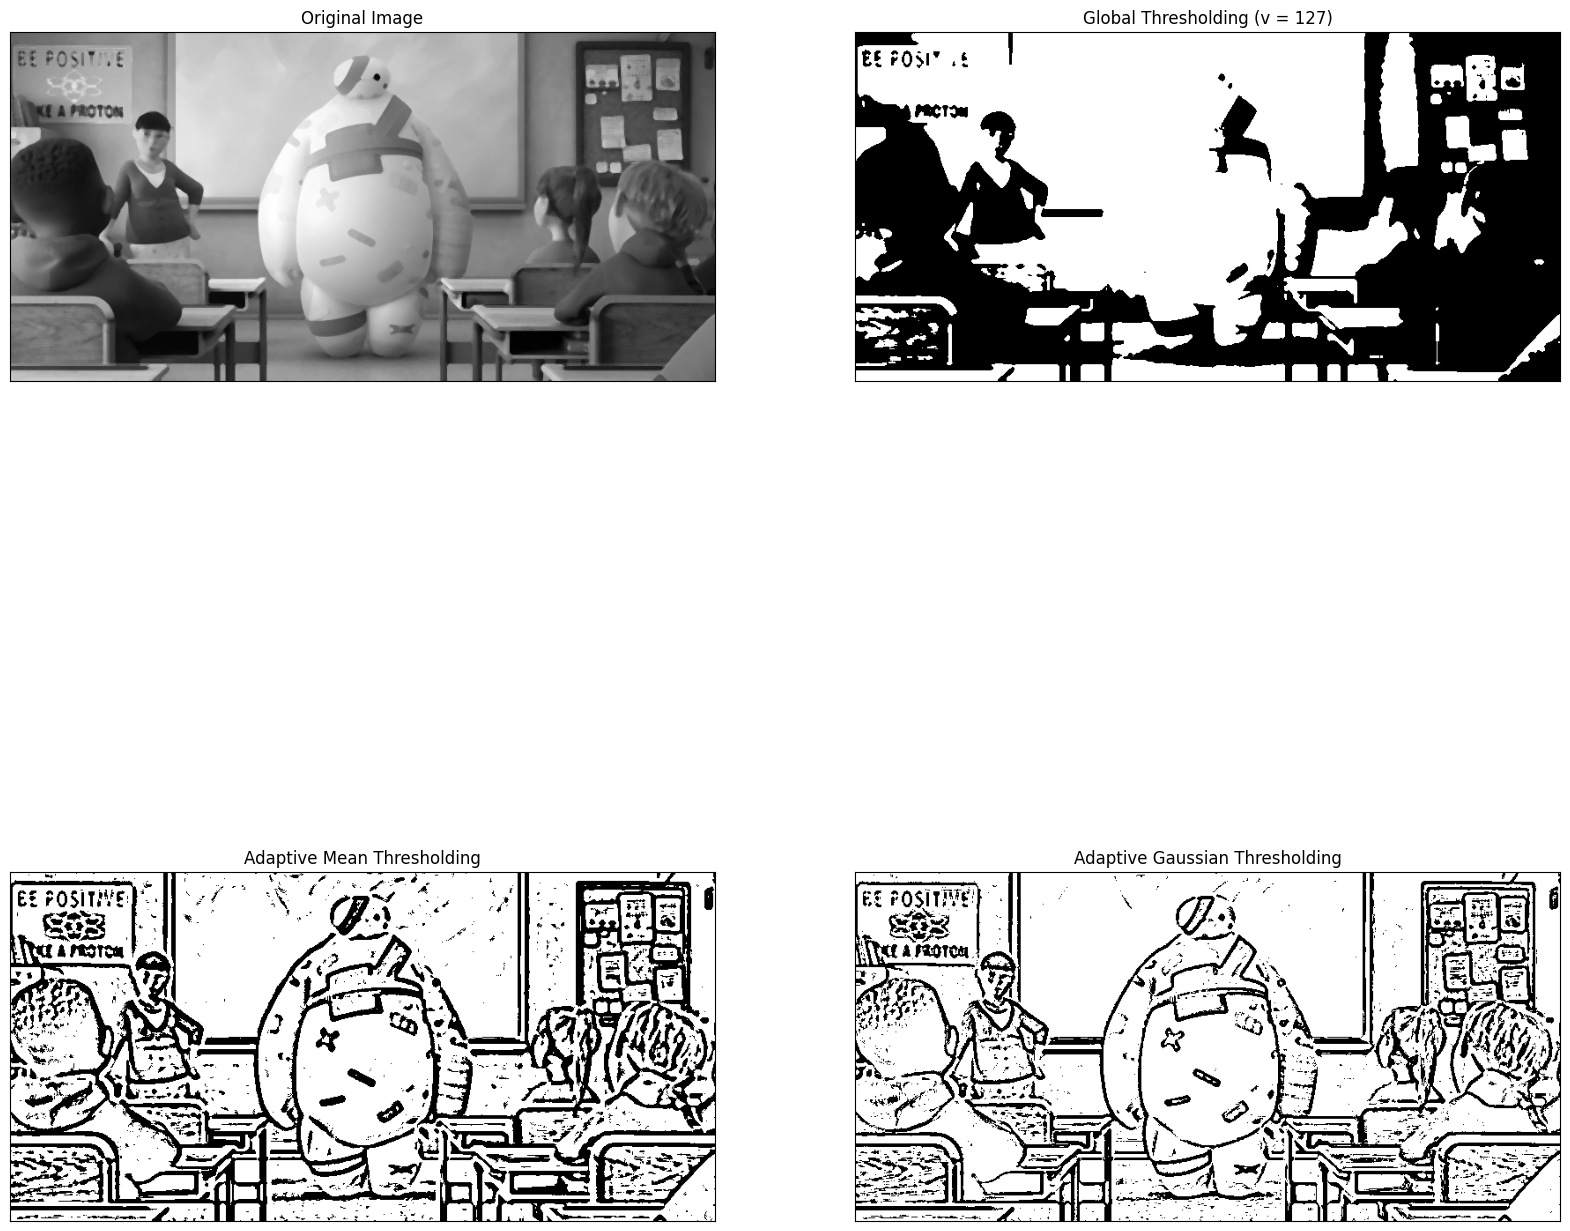

: 

In [15]:
# masih menggunakan variabel img yang sama
#img = cv2.imread('images/baymax.jpg',0)

# digunakan median blur untuk menghaluskan tepi objek pada citra
# ini diperlukan agar thresholding memberikan hasil lebih baik
img = cv2.medianBlur(img,5)

# Lakukan Thresholding
# Binary Threshold
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Adaptive Threshold dengan Mean
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

# Adaptive Threshold dengan Gaussian
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)


# Plotting
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

# menampilkan hasil
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()